# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [2]:
# Import warnings
import warnings
warnings.filterwarnings(action="ignore")


In [3]:
# Import the libraries you will be using for analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.1.0
pandas version: 2.2.3
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

df = pd.read_parquet(r'C:\Users\DELL\Desktop\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-1.parquet')
df.info()
#df.to_csv("read_Sample.csv",index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [358]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
df.head()
df["tpep_pickup_datetime"].dt.hour.value_counts()

tpep_pickup_datetime
18    214294
17    207902
15    194886
16    194267
19    191289
14    190067
13    177379
12    168642
20    164436
21    160194
11    153084
22    146069
10    142658
9     130288
8     116209
23    113398
7      86313
0      84044
1      59165
6      43410
2      41508
3      27011
5      17724
4      17477
Name: count, dtype: int64

In [15]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'C:\Users\DELL\Desktop\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
file_list = [file for file in os.listdir() if file.endswith('.parquet')]
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df1 = pd.read_parquet(file_path)
        df1["hour"] = df1["tpep_pickup_datetime"].dt.hour
        df1["date"] = df1["tpep_pickup_datetime"].dt.date
        
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = df1.groupby(by= ["date","hour"]).apply(lambda x : x.sample(frac=0.05,random_state=42))
        #print(df1.groupby(by= ["date","hour"]).apply(lambda x : x.sample(frac=0.05,random_state=42)).head(50))
       # print(pd.to_datetime("2023-01-01").date())
        #print(df1[df1["date"] == pd.to_datetime("2023-01-01").date()].shape) #76021 , 5%->3801
        #print(sampled_data[sampled_data["date"]==pd.to_datetime("2023-01-01").date()].shape) #-> 3801, so exact 

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df,sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

In [8]:
df.shape

(1896400, 22)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [9]:
# Store the df in csv/parquet
df.to_csv('final_sampled_file.csv',index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [36]:
# Load the new data file

df2 = pd.read_csv(r"C:\Users\viagrawal\OneDrive - HealthEdge Software, Inc\Documents\Personal\EDA NYC assigment\Datasets and Dictionary\Starter Notebook - EDA NYC Taxi\final_sampled_file.csv")

In [5]:
df2.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
3         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
4         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.86         1.0                  N           141           140   
1           7.74         1.0                  N           138           256   
2           1.24         1.0                  N           161           237   
3           1.44         1.0                  N           237           141   
4           0.54         1.0                  N           143           142   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        2.00           0.0   
1             2  ...      0.5        0.00           0.0   
2             1  ...      0.5        2.58           0.0   
3             2  ...      0.5        0.00           0.0   
4             2  ...      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         13.50                   2.5         0.00   
1                    1.0         41.15                   0.0         1.25   
2                    1.0         15.48                   2.5         0.00   
3                    1.0         16.40                   2.5         0.00   
4                    1.0         11.50                   2.5         0.00   

   hour        date  Airport_fee  
0    23  2022-12-31          NaN  
1     0  2023-01-01          NaN  
2     0  2023-01-01          NaN  
3     0  2023-01-01          NaN  
4     0  2023-01-01          NaN  

[5 rows x 22 columns]

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
 19  hour                   int64  
 20  date                   object 
 21  Airport_fee            float64
dtypes: float64(13), in

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [37]:
# Fix the index and drop any columns that are not needed
df2.reset_index(drop=True,inplace=True)
df2.drop(columns=["date","hour"],inplace=True)

In [14]:
df2.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            64874
trip_distance                  0
RatecodeID                 64874
store_and_fwd_flag         64874
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       64874
airport_fee              1747917
Airport_fee               213357
dtype: int64

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
 19  Airport_fee            float64
dtypes: float64(13), int64(4), object(3)
memory usage: 289.4+ MB


In [38]:
df2["tpep_pickup_datetime"] = pd.to_datetime(df2["tpep_pickup_datetime"])
df2["tpep_dropoff_datetime"] = pd.to_datetime(df2["tpep_dropoff_datetime"])

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [8]:
# Combine the two airport fee columns
df2[["airport_fee","Airport_fee"]]


airport_fee  Airport_fee
0               0.00          NaN
1               1.25          NaN
2               0.00          NaN
3               0.00          NaN
4               0.00          NaN
...              ...          ...
1896395          NaN          0.0
1896396          NaN          0.0
1896397          NaN          0.0
1896398          NaN          0.0
1896399          NaN          0.0

[1896400 rows x 2 columns]

In [39]:
df2["Airport_fee"] = df2["Airport_fee"].fillna(df2["airport_fee"])
df2.drop(columns=["airport_fee"],inplace=True)


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [10]:
# check where values of fare amount are negative()
(df2.select_dtypes(include="number") < 0).any() #extra, mta_tax , improvement_surcharge ,total_amount,congestion_surcharge,Airport_fee 


VendorID                 False
passenger_count          False
trip_distance            False
RatecodeID               False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                     True
mta_tax                   True
tip_amount               False
tolls_amount             False
improvement_surcharge     True
total_amount              True
congestion_surcharge      True
Airport_fee               True
dtype: bool

Did you notice something different in the `RatecodeID` column for above records?

In [40]:
# Analyse RatecodeID for the negative fare amounts
df2.RatecodeID.value_counts() # 99 is not valid
df2.loc[df2.RatecodeID == 99.0, "RatecodeID"] = df2.RatecodeID.mode()[0]
df2.RatecodeID.value_counts()

RatecodeID
1.0    1739731
2.0      71670
5.0      10275
3.0       6124
4.0       3723
6.0          3
Name: count, dtype: int64

In [12]:
# Find which columns have negative values
(df2.select_dtypes(include="number") < 0).any()
 #extra, mta_tax , improvement_surcharge ,total_amount,congestion_surcharge,Airport_fee 



VendorID                 False
passenger_count          False
trip_distance            False
RatecodeID               False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                     True
mta_tax                   True
tip_amount               False
tolls_amount             False
improvement_surcharge     True
total_amount              True
congestion_surcharge      True
Airport_fee               True
dtype: bool

In [41]:
# fix these negative values
df2[df2.extra < 0]
df2.loc[df2["extra"] < 0,"extra"]  *= -1



In [42]:
df2.loc[df2["mta_tax"] < 0,"mta_tax"].value_counts()
df2.loc[df2["mta_tax"] < 0,"mta_tax"]  *= -1


In [43]:
df2.loc[df2["improvement_surcharge"] < 0,"improvement_surcharge"].value_counts()
df2.loc[df2["improvement_surcharge"] < 0,"improvement_surcharge"]  *= -1

In [44]:
df2[df2["total_amount"] < 0]
#drop these i think
df2 = df2[df2["total_amount"]> 0]


In [45]:
df2[df2["congestion_surcharge"] < 0] #nothing left
df2[df2["Airport_fee"] < 0] #nothing left


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [28]:
df2.shape

(1896012, 19)

In [46]:
df2.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          64864
trip_distance                0
RatecodeID               64864
store_and_fwd_flag       64864
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     64864
Airport_fee              64864
dtype: int64

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [30]:
# Find the proportion of missing values in each column
100*df2.isnull().sum()/df2.shape[0]


VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.421075
trip_distance            0.000000
RatecodeID               3.421075
store_and_fwd_flag       3.421075
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.421075
Airport_fee              3.421075
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [47]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

df2["passenger_count"].fillna(df2.passenger_count.median(),inplace=True)



Did you find zeroes in passenger_count? Handle these.

In [48]:
df2.loc[df2["passenger_count"]==0,"passenger_count"] = df2.passenger_count.median()

In [49]:
df2.loc[df2["passenger_count"]==0,"passenger_count"]

Series([], Name: passenger_count, dtype: float64)

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [50]:
# Fix missing values in 'RatecodeID'
df2["RatecodeID"].fillna(df2.RatecodeID.mode()[0],inplace=True)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [51]:
# handle null values in congestion_surcharge


df2["congestion_surcharge"].fillna(df2.congestion_surcharge.median(),inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [52]:
# Handle any remaining missing values

df2["store_and_fwd_flag"].fillna(df2.store_and_fwd_flag.mode()[0],inplace=True)

In [24]:
100*df2.isnull().sum()/df2.shape[0]

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
store_and_fwd_flag       0.000000
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
Airport_fee              3.421075
dtype: float64

In [53]:
#df2.Airport_fee.mode()[0]
df2["Airport_fee"].fillna(df2.Airport_fee.mode()[0],inplace=True)

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896012 entries, 0 to 1896399
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            floa

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [54]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df2.Airport_fee.value_counts() 
df2.tolls_amount.value_counts()
df2[df2["tolls_amount"]>20]
df2[(df2["trip_distance"]<2) & (df2["fare_amount"]> 300)].shape

(39, 19)

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [55]:
# remove passenger_count > 6
df2 = df2[df2.passenger_count <= 6]

In [56]:
# Continue with outlier handling
df2 = df2[~((df2["trip_distance"]<2) & (df2["fare_amount"]> 300))]


In [57]:
df2 = df2[~(df2["VendorID"] ==6)] #remove vendor 6 as it is not valid

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444 entries, 162827 to 1888621
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               444 non-null    int64         
 1   tpep_pickup_datetime   444 non-null    datetime64[ns]
 2   tpep_dropoff_datetime  444 non-null    datetime64[ns]
 3   passenger_count        444 non-null    float64       
 4   trip_distance          444 non-null    float64       
 5   RatecodeID             444 non-null    float64       
 6   store_and_fwd_flag     444 non-null    object        
 7   PULocationID           444 non-null    int64         
 8   DOLocationID           444 non-null    int64         
 9   payment_type           444 non-null    int64         
 10  fare_amount            444 non-null    float64       
 11  extra                  444 non-null    float64       
 12  mta_tax                444 non-null    float64       
 13  t

In [58]:
# Do any columns need standardising?

df2.head()
#df2.payment_type.value_counts()
df2.loc[(df2["PULocationID"] == df2["DOLocationID"]) ] #not dropping, seems fine

df2.loc[~(df2["Airport_fee"]+df2["fare_amount"]+df2["congestion_surcharge"]+df2["improvement_surcharge"]+
         df2["extra"]+ df2["mta_tax"]+df2["tip_amount"]+df2["tolls_amount"]== df2["total_amount"])]
#640807 rows, should we update it?

df3 = df2.loc[~(df2["Airport_fee"]+df2["fare_amount"]+df2["congestion_surcharge"]+df2["improvement_surcharge"]+
         df2["extra"]+ df2["mta_tax"]+df2["tip_amount"]+df2["tolls_amount"]== df2["total_amount"])]
#df2.shape

In [59]:
(df3["total_amount"]-df3["Airport_fee"]-df3["fare_amount"]-df3["congestion_surcharge"]-df3["improvement_surcharge"]-df3["extra"]- df3["mta_tax"]-df3["tip_amount"]-df3["tolls_amount"]).value_counts()

-2.500000e+00    182436
-2.500000e+00     46566
-2.500000e+00     43280
 0.000000e+00     35711
-2.500000e+00     30495
                  ...  
-7.815970e-14         1
 6.838974e-14         1
-4.250000e+00         1
-1.750000e+00         1
-4.250000e+00         1
Name: count, Length: 574, dtype: int64

In [60]:
#differences are small, so better to update the total amount
df2["total_amount"] = df2["Airport_fee"]+df2["fare_amount"]+df2["congestion_surcharge"]+df2["improvement_surcharge"]+df2["extra"]+ df2["mta_tax"]+df2["tip_amount"]+df2["tolls_amount"]

In [61]:
#check again
df2.loc[~(df2["Airport_fee"]+df2["fare_amount"]+df2["congestion_surcharge"]+df2["improvement_surcharge"]+
         df2["extra"]+ df2["mta_tax"]+df2["tip_amount"]+df2["tolls_amount"]== df2["total_amount"])]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [62]:
df2.loc[((df2["PULocationID"] != df2["DOLocationID"]) & (df2["trip_distance"] == 0)) ] #not valid, should drop
df2 = df2.loc[~((df2["PULocationID"] != df2["DOLocationID"]) & (df2["trip_distance"] == 0)) ]

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1874190 entries, 0 to 1896399
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            floa

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [50]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'hour',
 'date',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: datetime
* `tpep_dropoff_datetime`: datetime
* `passenger_count`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Categorical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?

Numerical
* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

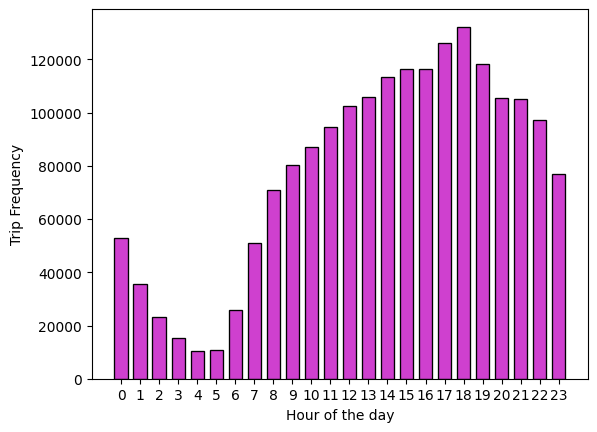

In [63]:
# Find and show the hourly trends in taxi pickups
sns.histplot(x=df2.tpep_pickup_datetime.dt.hour,bins=range(0,24),color="m",discrete=True,shrink=0.7)
plt.xlabel("Hour of the day")
plt.ylabel("Trip Frequency")
plt.xticks(ticks=range(24))
plt.show()


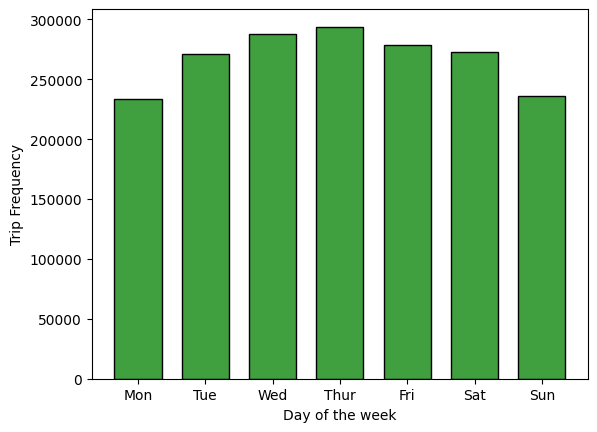

In [64]:
# Find and show the daily trends in taxi pickups (days of the week)
week_labels = ["Mon","Tue","Wed","Thur","Fri","Sat","Sun"]
sns.histplot(data=df2.tpep_pickup_datetime.dt.day_of_week,bins=range(0,8),color="green",discrete=True,shrink=0.7)
plt.xlabel("Day of the week")
plt.ylabel("Trip Frequency")
plt.xticks(ticks=range(7),labels=week_labels)
plt.show()

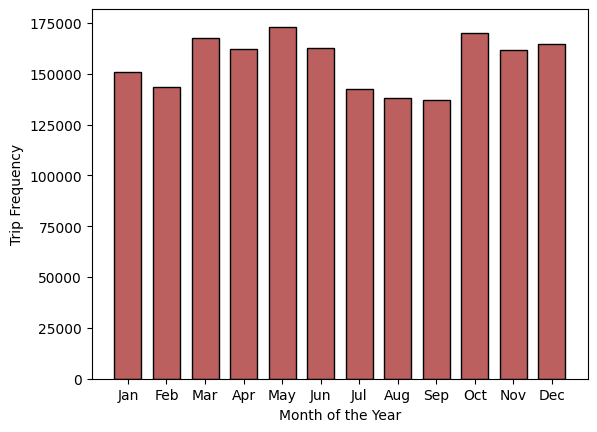

In [65]:
# Show the monthly trends in pickups
months_labels = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
sns.histplot(data=df2.tpep_pickup_datetime.dt.month,bins=range(1,13),color="brown",discrete=True,shrink=0.7)
plt.xlabel("Month of the Year")
plt.ylabel("Trip Frequency")
plt.xticks(ticks=range(1,13),labels=months_labels)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [66]:
# Analyse the above parameters
df2[df2.fare_amount <=0] # not valid , needs to be dropped
df2[df2.tip_amount <=0] #  valid , tip is not required
df2[df2.total_amount <=0] # empty
df2[df2.trip_distance <=0] # not valid , needs to be dropped

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
119             2  2023-01-01 00:47:28   2023-01-01 00:47:32              1.0   
128             1  2023-01-01 00:45:06   2023-01-01 00:54:06              1.0   
281             2  2023-01-01 01:34:06   2023-01-01 01:34:14              2.0   
300             1  2023-01-01 01:25:41   2023-01-01 01:25:45              1.0   
306             1  2023-01-01 01:26:38   2023-01-01 01:27:12              1.0   
...           ...                  ...                   ...              ...   
1896064         2  2023-09-30 23:34:29   2023-09-30 23:49:06              1.0   
1896147         2  2023-09-30 23:06:18   2023-09-30 23:06:29              1.0   
1896182         2  2023-09-30 23:30:41   2023-10-01 00:05:26              4.0   
1896359         2  2023-09-30 23:15:27   2023-09-30 23:22:37              2.0   
1896368         1  2023-09-30 23:13:43   2023-09-30 23:14:07              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
119                0.0         5.0                  N           232   
128                0.0         1.0                  N            48   
281                0.0         5.0                  N           265   
300                0.0         1.0                  N           148   
306                0.0         5.0                  N           229   
...                ...         ...                ...           ...   
1896064            0.0         1.0                  N           264   
1896147            0.0         1.0                  N           132   
1896182            0.0         1.0                  N           264   
1896359            0.0         1.0                  N           264   
1896368            0.0         5.0                  Y           148   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
119               232             1         14.0    0.0      0.0        0.00   
128                48             2          8.6    3.5      0.5        0.00   
281               265             1         50.0    0.0      0.0       10.20   
300               148             1          3.0    3.5      0.5       52.00   
306               229             1          5.0    0.0      0.0        0.00   
...               ...           ...          ...    ...      ...         ...   
1896064           264             1         12.8    1.0      0.5        4.59   
1896147           132             4          3.0    1.0      0.5        0.00   
1896182           264             2         26.8    1.0      0.5        0.00   
1896359           264             1          7.9    1.0      0.5        1.55   
1896368           148             1         10.0    0.0      0.0        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
119               0.0                    1.0         15.00   
128               0.0                    1.0         16.10   
281               0.0                    1.0         61.20   
300               0.0                    1.0         62.50   
306               0.0                    1.0          6.00   
...               ...                    ...           ...   
1896064           0.0                    1.0         19.89   
1896147           0.0                    1.0          7.25   
1896182           0.0                    1.0         29.30   
1896359           0.0                    1.0         14.45   
1896368           0.0                    1.0         11.00   

         congestion_surcharge  Airport_fee  
119                       0.0         0.00  
128                       2.5         0.00  
281                       0.0         0.00  
300                       2.5         0.00  
306                       0.0         0.00  
...                       ...          ...  
1896064                   0.0         0.00  
1896147                   0.0         1.75  
1896182                   0.0         0.00  
1896359                   2

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [67]:
# Create a df with non zero entries for the selected parameters.
df_final = df2[~((df2.fare_amount <=0) | (df2.trip_distance <=0))]

df_final = df_final[~((df_final.fare_amount <1) & (df_final.trip_distance>1)) ]#these don't seem valid fare amount is less than 1 and trip distance is more

df_final[df_final["trip_distance"]> 100] # these don't seem valid, fare amount is too less
df_final = df_final[df_final["trip_distance"] <= 100]


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

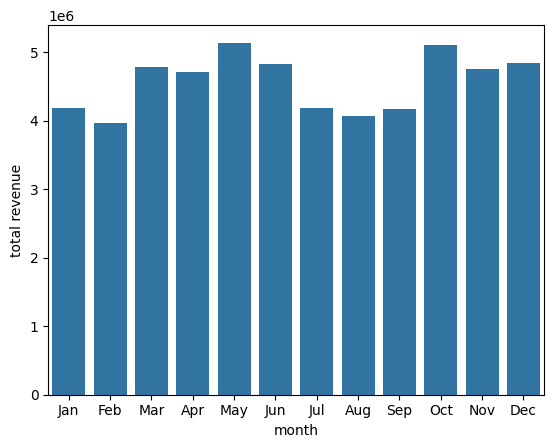

In [68]:
# Group data by month and analyse monthly revenue

monthly_data = df_final.groupby(by = df_final.tpep_pickup_datetime.dt.month)["total_amount"].sum()
monthly_data_df = monthly_data.reset_index()
monthly_data_df.head()
monthly_data_df.columns = ["month","total revenue"]
monthly_data_df.head()
sns.barplot(data = monthly_data_df , x= "month", y="total revenue")
plt.xticks(ticks=range(12),labels=months_labels)
plt.show()


<Axes: ylabel='total revenue'>

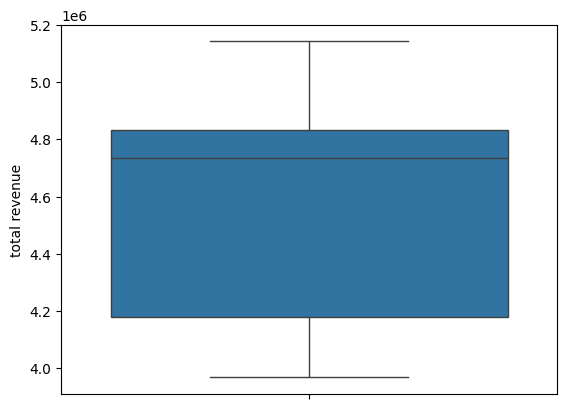

In [69]:
sns.boxplot(data = monthly_data_df["total revenue"])

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

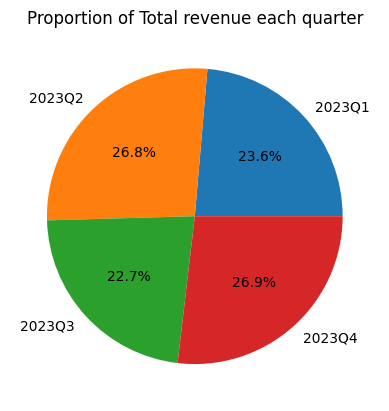

In [70]:
# Calculate proportion of each quarter
df_final.groupby(by = df_final.tpep_pickup_datetime.dt.to_period("Q"))["total_amount"].sum()
df_final[df_final["tpep_pickup_datetime"].dt.year == 2022]
df_final = df_final[~(df_final["tpep_pickup_datetime"].dt.year == 2022)]
quartely_data = df_final.groupby(by = df_final.tpep_pickup_datetime.dt.to_period("Q"))["total_amount"].sum()

plt.pie(quartely_data,labels=quartely_data.index, autopct="%1.1f%%")
plt.title("Proportion of Total revenue each quarter")
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

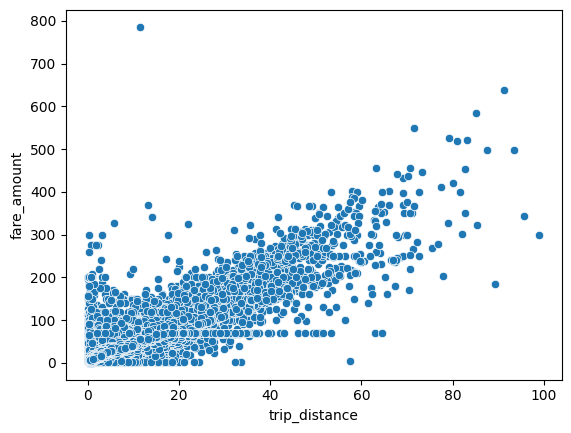

In [71]:
# Show how trip fare is affected by distance

#sns.boxplot(df_final.T)
df_without_zero_trip_distance = df_final[df_final["trip_distance"] > 0.1]
sns.scatterplot(data= df_without_zero_trip_distance, x = "trip_distance",y="fare_amount")
plt.show()
#trip fare increases with trip distance



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [72]:
# Show relationship between fare and trip duration
#Adding trip duration
df_without_zero_trip_distance["trip_duration_in_mins"] = ((df_without_zero_trip_distance["tpep_dropoff_datetime"] - df_without_zero_trip_distance["tpep_pickup_datetime"]).dt.total_seconds()/60).round(2)
df_without_zero_trip_distance.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
3         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
4         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
5         2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
1           7.74         1.0                  N           138           256   
2           1.24         1.0                  N           161           237   
3           1.44         1.0                  N           237           141   
4           0.54         1.0                  N           143           142   
5          19.24         1.0                  N            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
1             2        32.40    6.0      0.5        0.00           0.0   
2             1         7.90    1.0      0.5        2.58           0.0   
3             2        11.40    1.0      0.5        0.00           0.0   
4             2         6.50    1.0      0.5        0.00           0.0   
5             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
1                    1.0         41.15                   0.0         1.25   
2                    1.0         15.48                   2.5         0.00   
3                    1.0         16.40                   2.5         0.00   
4                    1.0         11.50                   2.5         0.00   
5                    1.0         35.57                   2.5         0.00   

   trip_duration_in_mins  
1                  15.95  
2                   5.08  
3                  10.55  
4                   5.42  
5                  18.00

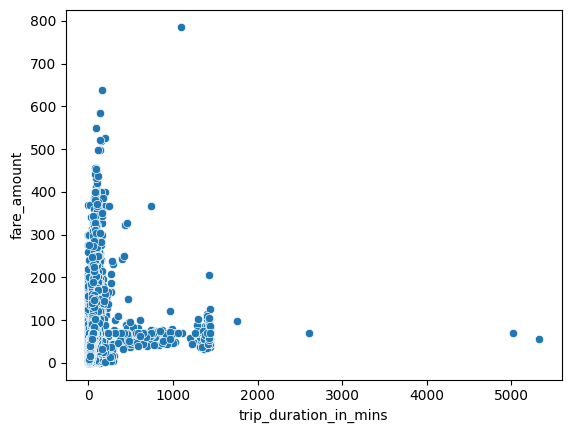

In [73]:
#df_without_zero_trip_distance[(df_without_zero_trip_distance["trip_duration_in_mins"] > 300) & (df_without_zero_trip_distance["total_amount"] < 50)]
df_with_valid_trip_duration = df_without_zero_trip_distance[~((df_without_zero_trip_distance["trip_duration_in_mins"] > 300) & (df_without_zero_trip_distance["total_amount"] < 50))]
df_with_valid_trip_duration = df_with_valid_trip_duration[~(df_with_valid_trip_duration.trip_duration_in_mins <= 0)]#removing zero mins trips and negative
sns.scatterplot(data= df_with_valid_trip_duration, x = "trip_duration_in_mins",y="fare_amount")
plt.show()
#fare does not increase with trip duration

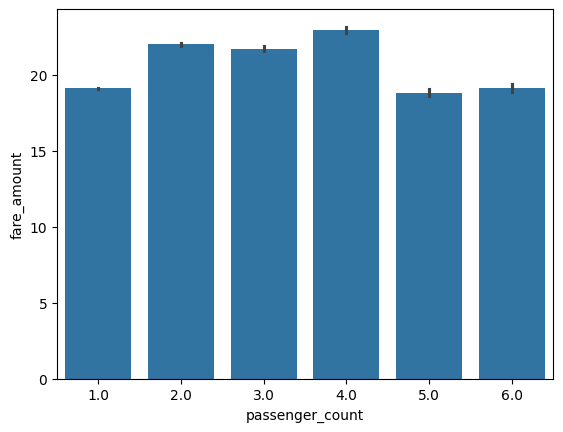

In [74]:
# Show relationship between fare and number of passengers
sns.barplot(data= df_with_valid_trip_duration, x = "passenger_count",y="fare_amount")
plt.show()


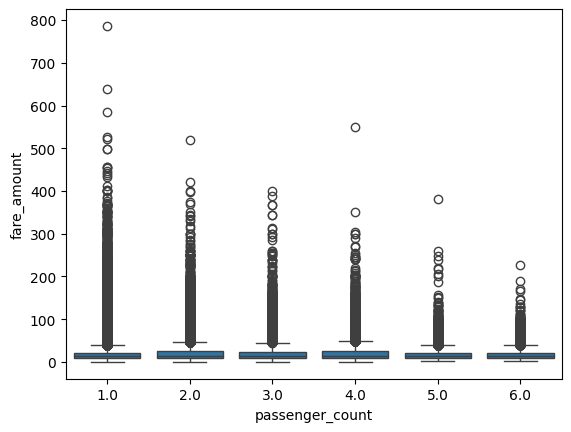

In [75]:
sns.boxplot(data = df_with_valid_trip_duration , x="passenger_count",y="fare_amount")
plt.show()
#no realtion between passenger count and fare amount

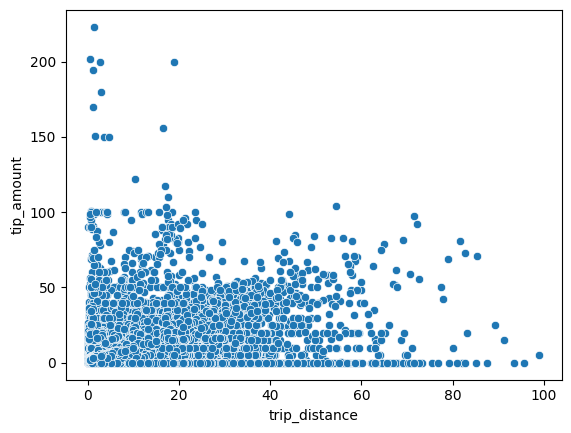

In [76]:
# Show relationship between tip and trip distance
sns.scatterplot(data= df_without_zero_trip_distance, x = "trip_distance",y="tip_amount")
plt.show()
#no realtion


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

<Axes: xlabel='payment_type', ylabel='fare_amount'>

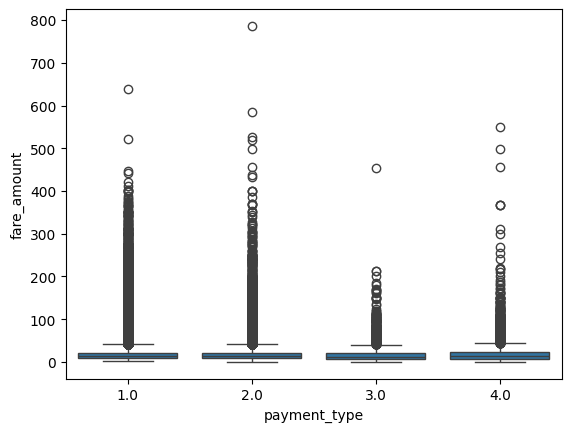

In [77]:
# Analyse the distribution of different payment types (payment_type).
df_with_valid_trip_duration[df_with_valid_trip_duration.payment_type == 0]
df_with_valid_trip_duration.loc[df_with_valid_trip_duration.payment_type == 0 ,"payment_type"] = df_with_valid_trip_duration.payment_type.mode()

sns.boxplot(data = df_with_valid_trip_duration , x= "payment_type", y="fare_amount")


In [78]:
df_with_valid_trip_duration.payment_type.value_counts()

payment_type
1.0    1476394
2.0     306956
4.0      11358
3.0       6207
Name: count, dtype: int64

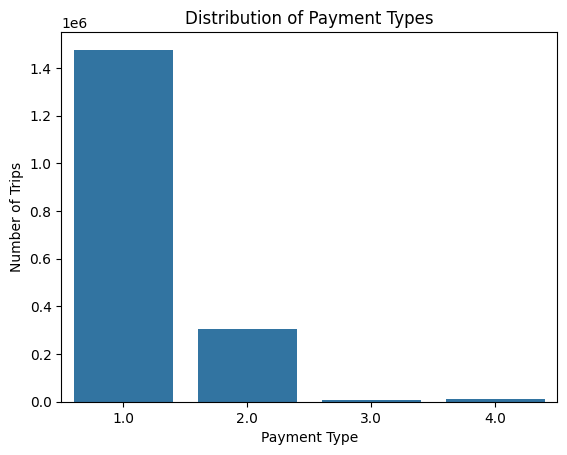

In [80]:
sns.countplot(data = df_with_valid_trip_duration , x= "payment_type")

plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [68]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [82]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r"C:\Users\viagrawal\OneDrive - HealthEdge Software, Inc\Documents\Personal\EDA NYC assigment\Datasets and Dictionary\taxi_zones\taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

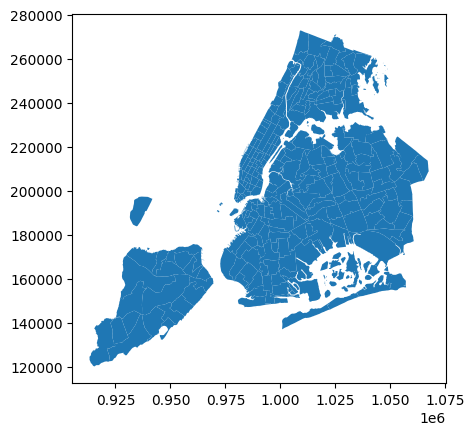

In [83]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [85]:
df_with_valid_trip_duration.head()
#zones.head()
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

In [86]:
# Merge zones and trip records using locationID and PULocationID

df_merged = df_with_valid_trip_duration.merge(zones,left_on="PULocationID",right_on="LocationID",how="left")
df_merged.drop(columns=["LocationID"],inplace=True)
df_merged.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         1.0                  N            66           107   

   payment_type  ...  total_amount  congestion_surcharge  Airport_fee  \
0           2.0  ...         41.15                   0.0         1.25   
1           1.0  ...         15.48                   2.5         0.00   
2           2.0  ...         16.40                   2.5         0.00   
3           2.0  ...         11.50                   2.5         0.00   
4           NaN  ...         35.57                   2.5         0.00   

   trip_duration_in_mins  OBJECTID  Shape_Leng  Shape_Area  \
0                  15.95     138.0    0.107467    0.000537   
1                   5.08     161.0    0.035804    0.000072   
2                  10.55     237.0    0.042213    0.000096   
3                   5.42     143.0    0.054180    0.000151   
4                  18.00      66.0    0.054633    0.000108   

                    zone    borough  \
0      LaGuardia Airport     Queens   
1         Midtown Center  Manhattan   
2  Upper East Side South  Manhattan   
3    Lincoln Square West  Manhattan   
4     DUMBO/Vinegar Hill   Brooklyn   

                                            geometry  
0  MULTIPOLYGON (((1019904.219 225677.983, 102031...  
1  POLYGON ((991081.026 214453.698, 990952.644 21...  
2  POLYGON ((993633.442 216961.016, 993507.232 21...  
3  POLYGON ((989338.1 223572.253, 989368.225 2235...  
4  POLYGON ((990055.507 196472.349, 990004.46 196...  

[5 rows x 26 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [88]:
# Group data by location and calculate the number of trips
df_merged.groupby(by="PULocationID")["PULocationID"].value_counts()




PULocationID
1         23
2          2
3         32
4       2196
5          9
       ...  
261     9738
262    24866
263    35671
264    15895
265      273
Name: count, Length: 256, dtype: int64

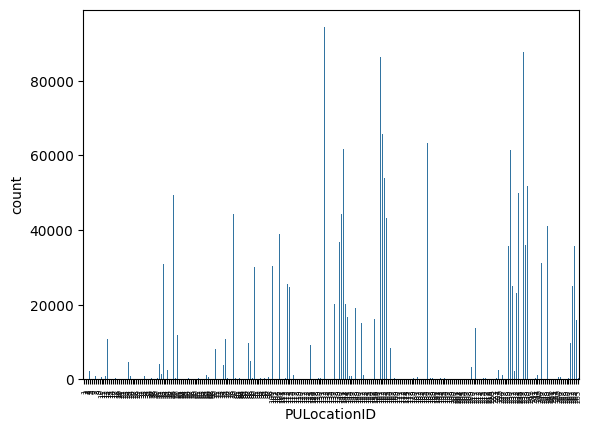

<Figure size 2400x6000 with 0 Axes>

In [89]:
sns.countplot(data = df_merged , x= "PULocationID",width=0.5)
plt.xticks(rotation=90,fontsize=5)
plt.figure(figsize=(24,60))
plt.tight_layout()
plt.show()

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [90]:
# Merge trip counts back to the zones GeoDataFrame

trip_counts = df_merged.groupby(by = "PULocationID").size().reset_index(name="trip_count")
trip_counts.head()
zones_with_trip_count = zones.merge(trip_counts,left_on="LocationID",right_on="PULocationID",how="left")
zones_with_trip_count[zones_with_trip_count["trip_count"].notna()]["trip_count"].value_counts()

trip_count
1.0        8
23.0       7
3.0        6
2.0        6
65.0       5
          ..
210.0      1
649.0      1
21.0       1
30241.0    1
35671.0    1
Name: count, Length: 191, dtype: int64

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

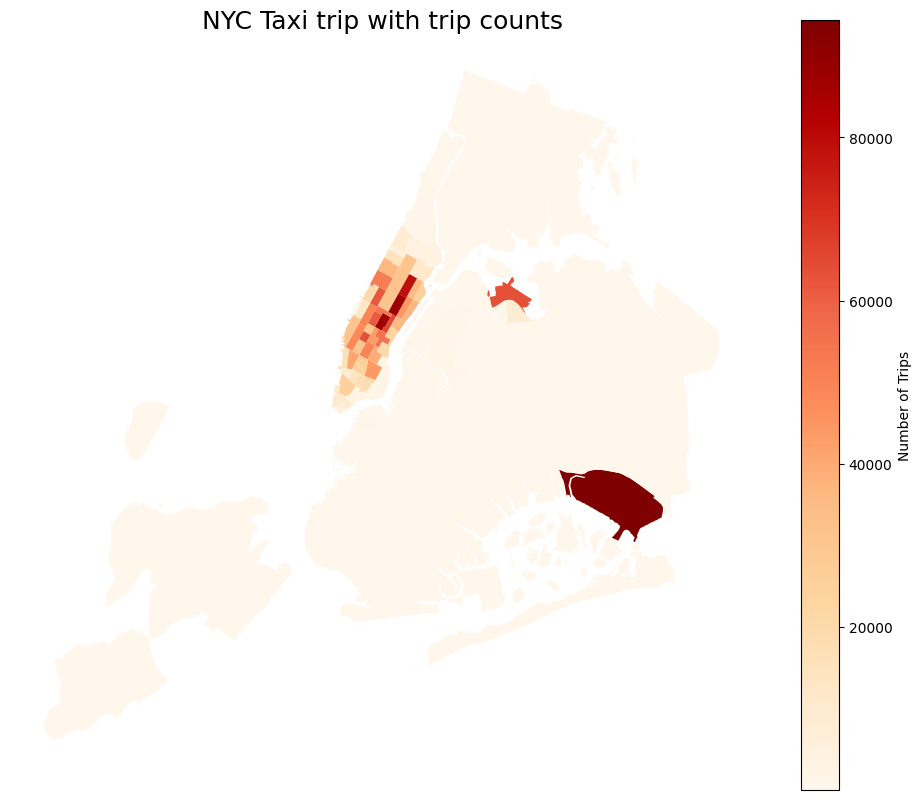

In [91]:
# Define figure and axis
fig, ax = plt.subplots(1,1, figsize=(12,10))


# Plot the map and display it
zones_with_trip_count.plot(column="trip_count",ax=ax,legend=True,cmap="OrRd",legend_kwds={'label':"Number of Trips",
                                                                                           'orientation':"vertical"})
ax.set_title("NYC Taxi trip with trip counts",fontsize=18)
ax.axis("off")
plt.show()



In [92]:
# can you try displaying the zones DF sorted by the number of trips?

sorted_zones = zones_with_trip_count.sort_values(by="trip_count",ascending=False)
print(sorted_zones[["PULocationID","zone","borough","trip_count"]])

     PULocationID                                           zone  \
131         132.0                                    JFK Airport   
236         237.0                          Upper East Side South   
160         161.0                                 Midtown Center   
235         236.0                          Upper East Side North   
161         162.0                                   Midtown East   
..            ...                                            ...   
104           NaN  Governor's Island/Ellis Island/Liberty Island   
108           NaN                                    Great Kills   
109           NaN                               Great Kills Park   
175           NaN                                        Oakwood   
220           NaN                                      Stapleton   

           borough  trip_count  
131         Queens     94388.0  
236      Manhattan     87625.0  
160      Manhattan     86322.0  
235      Manhattan     78759.0  
161      Manhattan

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


##### 1. Busiest hours, days and months 

Busiest hours: Peak ride activity occurs around evening 5pm - 7pm.

Busiest days: Thursday tends to be the busiest, followed by wed and fri and sat.

Busiest months: The number of trips peaks from March as is tourist season kick off, july to sept are the lowest as tourist season declines and further rises back from Oct-Dec.

##### 2. Trends in revenue collected

Monthly Revenue: The Monthly revenue rises from March to June, declining in July-August and again picking up in Oct-Dec, This indicates in tourist season the revenues spikes

##### 3. Trends in quarterly revenue
Quarterly Revenue:
Q1 2023: ~23.8% of annual revenue.
Q2 2023: ~26.8%
Q3 2023: ~22.6%
Q4 2023: ~26.7%

Suggests Q2 and Q4 has peak revenue periods and Q3 has lowest, potentially due to holidays, events, or seasonal travel .

##### 4. How fare depends on trip distance, trip duration and passenger counts

Trip Distance vs Fare: There’s a clear upward trend — longer trips lead to higher fares, therfore postive correlation.
Trip Duration vs Fare: Longer trips in minutes does not lead to higher fare amounts., it indicates that slowest routes is not profitable for the company
Passenger Count vs Fare: There's minimal direct correlation; fares don’t strongly depend on passenger count as the fare depends on trip distance not on number of passengers.

##### 5. How tip amount depends on trip distance

Trip Distance vs Tip:  Tipping remains inconsistent — possibly affected by rider behavior, payment method, or driver service, there is no correlation between tip amount and trip distance.

##### 6. Busiest zones

Top pickup zones:

JFK Airport – Top pickup spot by far.

Upper East Side North/South, Midtown Center/East (Manhattan) – High activity, likely due to dense residential and business areas.

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [93]:
# Find routes which have the slowest speeds at different times of the day

# Extract hour of pickup
df_with_valid_trip_duration['pickup_hour'] = df_with_valid_trip_duration['tpep_pickup_datetime'].dt.hour

#  Calculate speed in miles per hour
df_with_valid_trip_duration['speed_mph'] = (df_with_valid_trip_duration['trip_distance'] / (df_with_valid_trip_duration['trip_duration_in_mins'] / 60)).round(2)

df_with_valid_trip_duration.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
3         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
4         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
5         2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
1           7.74         1.0                  N           138           256   
2           1.24         1.0                  N           161           237   
3           1.44         1.0                  N           237           141   
4           0.54         1.0                  N           143           142   
5          19.24         1.0                  N            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
1           2.0  ...      0.5        0.00           0.0   
2           1.0  ...      0.5        2.58           0.0   
3           2.0  ...      0.5        0.00           0.0   
4           2.0  ...      0.5        0.00           0.0   
5           NaN  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
1                    1.0         41.15                   0.0         1.25   
2                    1.0         15.48                   2.5         0.00   
3                    1.0         16.40                   2.5         0.00   
4                    1.0         11.50                   2.5         0.00   
5                    1.0         35.57                   2.5         0.00   

   trip_duration_in_mins  pickup_hour  speed_mph  
1                  15.95            0      29.12  
2                   5.08            0      14.65  
3                  10.55            0       8.19  
4                   5.42            0       5.98  
5                  18.00            0      64.13  

[5 rows x 22 columns]

In [94]:
slowest_by_hour = df_with_valid_trip_duration.groupby(by="pickup_hour")["speed_mph"].mean().sort_values()
print(slowest_by_hour)

pickup_hour
14    10.274784
12    10.337753
16    10.641552
17    10.676458
18    10.760915
11    10.845404
15    10.948060
13    10.964291
10    11.222741
19    11.588765
9     11.730658
8     11.805143
20    12.694046
21    13.245400
7     13.754470
22    13.869926
1     15.355288
23    16.034503
0     16.659408
3     16.736150
2     17.496353
6     17.836491
4     19.822686
5     21.154438
Name: speed_mph, dtype: float64


In [95]:
pu_zone = zones_with_trip_count[["LocationID","zone"]].rename(columns={"LocationID":"PULocationID","zone":"PU_zone"})
trips_df = df_with_valid_trip_duration.merge(pu_zone,on="PULocationID",how="left")

do_zone = zones_with_trip_count[["LocationID","zone"]].rename(columns={"LocationID":"DOLocationID","zone":"DO_zone"})
trips_df = trips_df.merge(do_zone,on="DOLocationID",how="left")
trips_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         1.0                  N            66           107   

   payment_type  ...  tolls_amount  improvement_surcharge  total_amount  \
0           2.0  ...           0.0                    1.0         41.15   
1           1.0  ...           0.0                    1.0         15.48   
2           2.0  ...           0.0                    1.0         16.40   
3           2.0  ...           0.0                    1.0         11.50   
4           NaN  ...           0.0                    1.0         35.57   

   congestion_surcharge  Airport_fee  trip_duration_in_mins  pickup_hour  \
0                   0.0         1.25                  15.95            0   
1                   2.5         0.00                   5.08            0   
2                   2.5         0.00                  10.55            0   
3                   2.5         0.00                   5.42            0   
4                   2.5         0.00                  18.00            0   

   speed_mph                PU_zone                    DO_zone  
0      29.12      LaGuardia Airport  Williamsburg (South Side)  
1      14.65         Midtown Center      Upper East Side South  
2       8.19  Upper East Side South            Lenox Hill West  
3       5.98    Lincoln Square West        Lincoln Square East  
4      64.13     DUMBO/Vinegar Hill                   Gramercy  

[5 rows x 24 columns]

In [96]:
#Add route column
trips_df["route"] = trips_df["PU_zone"] + "->" +trips_df["DO_zone"]
trips_df.head()

#slowest routes
slowest_routes_by_hour = trips_df.groupby(by=["pickup_hour","route"])["speed_mph"].mean().sort_values().reset_index()


In [97]:
#get slowest routes per hour
slowest_routes_by_hour_each = slowest_routes_by_hour.loc[slowest_routes_by_hour.groupby("pickup_hour")["speed_mph"].idxmin()]
slowest_routes_by_hour_each

pickup_hour                                              route  speed_mph
61             0                           Glen Oaks->Arden Heights       0.60
3              1                      Clinton East->Pelham Bay Park       0.13
434            2     Prospect-Lefferts Gardens->Crown Heights North       2.73
542            3                  Midtown East->UN/Turtle Bay South       3.06
55             4                                   Astoria->Jamaica       0.54
10             5             Cambria Heights->Upper West Side North       0.21
22             6             Williamsbridge/Olinville->East Chelsea       0.29
20             7             Stuyvesant Heights->Stuyvesant Heights       0.27
9              8                         Manhattan Valley->Flushing       0.21
1              9  Greenwich Village North->Washington Heights South       0.08
14            10                             Fort Greene->Laurelton       0.23
8             11        East Williamsburg->Washington Heights South       0.20
7             12                    Manhattan Valley->Starrett City       0.19
12            13                    Morrisania/Melrose->Fort Greene       0.21
6             14                          Lenox Hill East->Canarsie       0.17
4             15               TriBeCa/Civic Center->West Concourse       0.14
28            16                         Baisley Park->Baisley Park       0.33
2             17                             Red Hook->Clinton West       0.13
35            18                    TriBeCa/Civic Center->Ridgewood       0.42
15            19                 UN/Turtle Bay South->Arden Heights       0.24
27            20           Upper West Side South->East Williamsburg       0.33
167           21                      Central Harlem->Midtown North       1.47
0             22  Greenwich Village North->University Heights/Mo...       0.05
75            23                              Dyker Heights->Hollis       0.72

How does identifying high-traffic, high-demand routes help us?


Identifying *high-traffic, high-demand routes* is valuable for improving operations, strategy, and customer experience in ride-hailing services. Here's how:

---

Operational Efficiency
- *Optimized Dispatching*: Knowing which routes are busiest helps deploy more cabs where they’re needed most, reducing wait times.
- *Dynamic Routing*: Avoid sending cabs to congested areas during peak times unless necessary.

---

Business & Revenue Strategy
- *Surge Pricing Optimization*: Apply surge pricing dynamically during high-demand hours/routes to maximize revenue.
- *Driver Incentives*: Offer bonuses or incentives for drivers to serve high-demand or underserved high-traffic routes.

---

Customer Experience
- *Reduced Wait Times*: Strategic cab placement means faster pickups and better service.
- *Accurate ETAs*: Better understanding of traffic patterns leads to more accurate trip duration estimates, improving reliability and trust.

---

Strategic Planning & Expansion
- *Route Improvements*: Work with city planners or use route data to request better infrastructure or signals on key slow corridors.

---
---

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Busiest hour of the day: 18:00 with ~2,618,600 estimated trips.


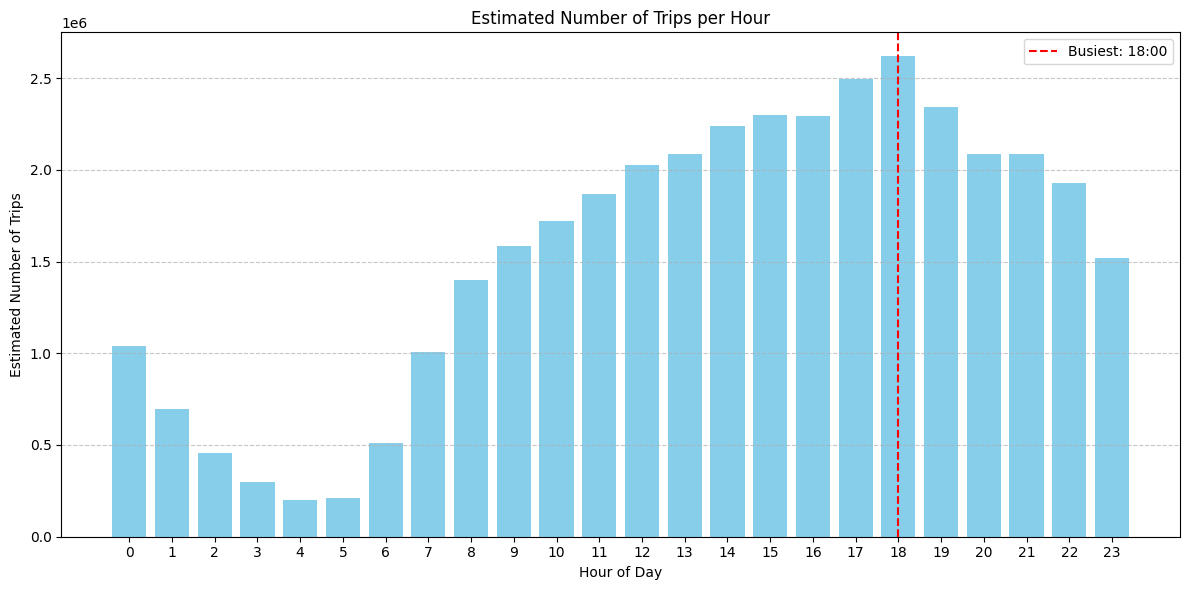

In [98]:
# Visualise the number of trips per hour and find the busiest hour

#Count number of trips per hour
trips_per_hour = trips_df.groupby('pickup_hour').size().reset_index(name='trip_count')

#Scale the count based on sampling ratio (e.g., if it's 1% sample, multiply by 100)
sampling_ratio = 0.05  # we can change this according to our sample
trips_per_hour['estimated_total'] = trips_per_hour['trip_count'] / sampling_ratio

#Find the busiest hour
busiest_hour_row = trips_per_hour.loc[trips_per_hour['estimated_total'].idxmax()]
busiest_hour = int(busiest_hour_row['pickup_hour'])
trip_count_busiest_hour = int(busiest_hour_row['estimated_total'])

print(f"Busiest hour of the day: {busiest_hour}:00 with ~{trip_count_busiest_hour:,} estimated trips.")

#Visualize

plt.figure(figsize=(12,6))
plt.bar(trips_per_hour['pickup_hour'], trips_per_hour['estimated_total'], color='skyblue')
plt.xlabel("Hour of Day")
plt.ylabel("Estimated Number of Trips")
plt.title("Estimated Number of Trips per Hour")
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(x=busiest_hour, color='red', linestyle='--', label=f'Busiest: {busiest_hour}:00')
plt.legend()
plt.tight_layout()
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [99]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
# Count trips per hour in the sample
hourly_counts = trips_df['pickup_hour'].value_counts().sort_index()

# Scale up to estimate actual total trip counts
hourly_counts_scaled = (hourly_counts / sample_fraction).astype(int)

# Get top 5 busiest hours
top_5_busiest = hourly_counts_scaled.sort_values(ascending=False).head(5)

print("Estimated actual number of trips in the 5 busiest hours:")
print(top_5_busiest)



Estimated actual number of trips in the 5 busiest hours:
pickup_hour
18    2618600
17    2496660
19    2342120
15    2297080
16    2295140
Name: count, dtype: int32


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

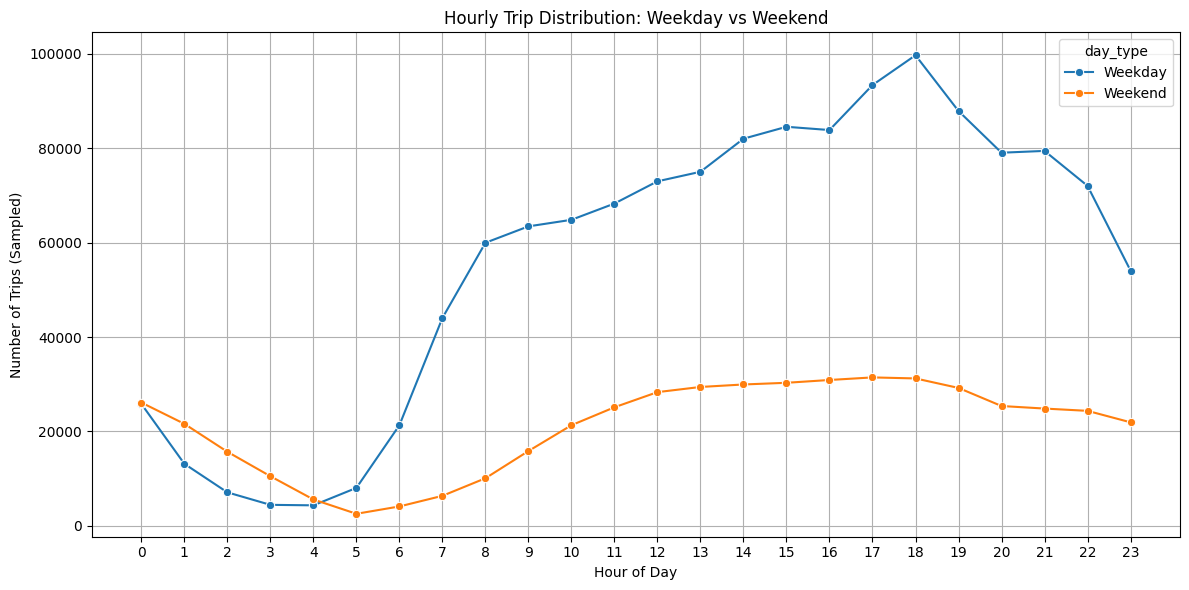

In [100]:
# Compare traffic trends for the week days and weekends

#  Extract relevant time features
trips_df['pickup_dayofweek'] = trips_df['tpep_pickup_datetime'].dt.dayofweek  

#  Label as 'Weekday' or 'Weekend'
trips_df['day_type'] = trips_df['pickup_dayofweek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Step 4: Group and count trips per hour by day_type
hourly_daytype_counts = (
    trips_df.groupby(['day_type', 'pickup_hour'])
    .size()
    .reset_index(name='trip_count')
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_daytype_counts, x='pickup_hour', y='trip_count', hue='day_type', marker='o')

plt.title('Hourly Trip Distribution: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips (Sampled)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

Top 10 pickup zones:
      PULocationID                     zone_name  pickup_count
125           132                   JFK Airport         94578
228           237         Upper East Side South         87630
154           161                Midtown Center         86329
227           236         Upper East Side North         78760
155           162                  Midtown East         65850
131           138             LaGuardia Airport         63870
178           186  Penn Station/Madison Sq West         63469
135           142           Lincoln Square East         61727
221           230     Times Sq/Theatre District         61479
163           170                   Murray Hill         54941

Top 10 dropoff zones:
      DOLocationID                  zone_name  dropoff_count
231           236      Upper East Side North          82449
232           237      Upper East Side South          78407
157           161             Midtown Center          72513
225           230  Times Sq/Thea

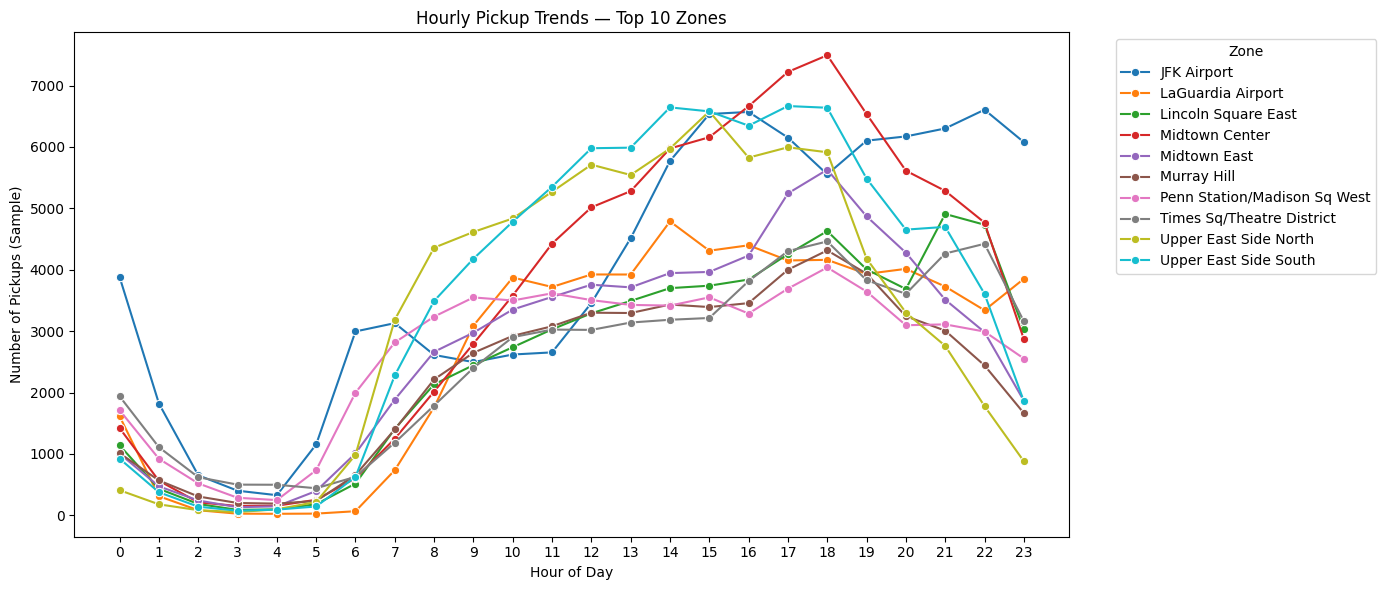

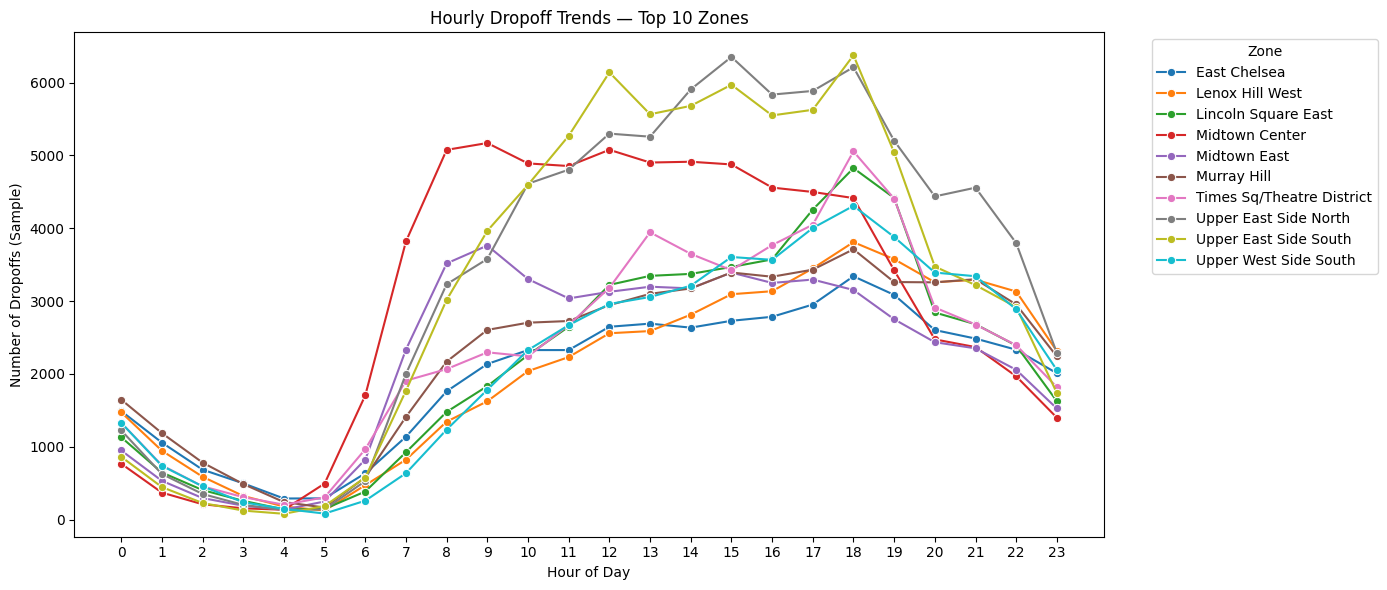

In [101]:
# Find top 10 pickup and dropoff zones
# Make sure datetime and hour columns exist
trips_df['tpep_dropoff_datetime'] = pd.to_datetime(trips_df['tpep_dropoff_datetime'])
trips_df['dropoff_hour'] = trips_df['tpep_dropoff_datetime'].dt.hour

#  Compute total pickups and dropoffs per zone
pickup_counts  = trips_df.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_counts = trips_df.groupby('DOLocationID').size().reset_index(name='dropoff_count')

#  Identify top‑10 zones by total volume
top10_pu = pickup_counts.nlargest(10, 'pickup_count')['PULocationID']
top10_do = dropoff_counts.nlargest(10, 'dropoff_count')['DOLocationID']

#  Map IDs to human‑readable names using your zones GeoDataFrame
zone_names = zones_with_trip_count[['PULocationID','zone']].rename(columns={'zone':'zone_name'})
pickup_counts  = pickup_counts.merge(zone_names, on='PULocationID', how='left')
dropoff_counts = dropoff_counts.merge(zone_names.rename(columns={'PULocationID':'DOLocationID'}),
                                      on='DOLocationID', how='left')

print("Top 10 pickup zones:\n", pickup_counts.nlargest(10,'pickup_count')[['PULocationID','zone_name','pickup_count']])
print("\nTop 10 dropoff zones:\n", dropoff_counts.nlargest(10,'dropoff_count')[['DOLocationID','zone_name','dropoff_count']])

# 5) Build hourly trend DataFrames for just those top‑10
pu_hourly = (
    trips_df[trips_df['PULocationID'].isin(top10_pu)]
    .groupby(['PULocationID','pickup_hour'])
    .size()
    .reset_index(name='count')
    .merge(zone_names, on='PULocationID', how='left')
)

do_hourly = (
    trips_df[trips_df['DOLocationID'].isin(top10_do)]
    .groupby(['DOLocationID','dropoff_hour'])
    .size()
    .reset_index(name='count')
    .merge(zone_names.rename(columns={'PULocationID':'DOLocationID','zone_name':'zone_name'}), 
           on='DOLocationID', how='left')
)

#  Plot pickup trends
plt.figure(figsize=(14,6))
sns.lineplot(data=pu_hourly, x='pickup_hour', y='count', hue='zone_name', marker='o')
plt.title("Hourly Pickup Trends — Top 10 Zones")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups (Sample)")
plt.legend(title="Zone", bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()

# Plot dropoff trends
plt.figure(figsize=(14,6))
sns.lineplot(data=do_hourly, x='dropoff_hour', y='count', hue='zone_name', marker='o')
plt.title("Hourly Dropoff Trends — Top 10 Zones")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Dropoffs (Sample)")
plt.legend(title="Zone", bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()




**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [102]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Compute total pickups per zone
pickup_counts = (
    trips_df
    .groupby('PULocationID')
    .size()
    .reset_index(name='pickup_count')
)

# 2) Compute total dropoffs per zone
dropoff_counts = (
    trips_df
    .groupby('DOLocationID')
    .size()
    .reset_index(name='dropoff_count')
    .rename(columns={'DOLocationID':'PULocationID'})
)

# 3) Merge pickups & dropoffs
ratio_df = pickup_counts.merge(dropoff_counts, on='PULocationID', how='outer')

# 4) Fill any missing counts with 0
ratio_df['pickup_count']  = ratio_df['pickup_count'].fillna(0).astype(int)
ratio_df['dropoff_count'] = ratio_df['dropoff_count'].fillna(0).astype(int)

# 5) Compute ratio (avoid division by zero)
ratio_df['pickup_dropoff_ratio'] = (
    ratio_df['pickup_count'] / ratio_df['dropoff_count'].replace(0, np.nan)
)

# 6) (Optional) Bring in human‑readable zone names
zone_names = zones_with_trip_count[['PULocationID','zone']].rename(columns={'zone':'zone_name'})
ratio_df = ratio_df.merge(zone_names, on='PULocationID', how='left')

# 7) Extract top‑10 and bottom‑10
top_10 = ratio_df.sort_values('pickup_dropoff_ratio', ascending=False).head(10)
bottom_10 = ratio_df.sort_values('pickup_dropoff_ratio', ascending=True).head(10)

# 8) Display the results
print("Top 10 zones by pickup/dropoff ratio:")
print(top_10[['PULocationID','zone_name','pickup_count','dropoff_count','pickup_dropoff_ratio']])

print("\nBottom 10 zones by pickup/dropoff ratio:")
print(bottom_10[['PULocationID','zone_name','pickup_count','dropoff_count','pickup_dropoff_ratio']])


Top 10 zones by pickup/dropoff ratio:
     PULocationID                     zone_name  pickup_count  dropoff_count  \
70             70                 East Elmhurst          8142            831   
128           132                   JFK Airport         94578          20333   
134           138             LaGuardia Airport         63870          23841   
182           186  Penn Station/Madison Sq West         63469          40420   
110           114       Greenwich Village South         24606          17861   
42             43                  Central Park         30977          22580   
245           249                  West Village         41106          30842   
158           162                  Midtown East         65850          52827   
100           100              Garment District         30247          25404   
157           161                Midtown Center         86329          72513   

     pickup_dropoff_ratio  
70               9.797834  
128              4.651453

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [103]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones


# Define night hours (11PM to 5AM)
night_hours = list(range(0, 6)) + [23]

# Filter only trips that occurred during night hours
df_night = trips_df[trips_df['pickup_hour'].isin(night_hours)].copy()

# Top 10 pickup zones during night
top_night_pickups = (
    df_night.groupby('PULocationID')
    .size()
    .reset_index(name='pickup_count')
    .sort_values('pickup_count', ascending=False)
    .head(10)
    .merge(zones_with_trip_count[['PULocationID', 'zone']], on='PULocationID', how='left')
)

# Top 10 dropoff zones during night
top_night_dropoffs = (
    df_night.groupby('DOLocationID')
    .size()
    .reset_index(name='dropoff_count')
    .sort_values('dropoff_count', ascending=False)
    .head(10)
    .merge(zones_with_trip_count[['PULocationID', 'zone']], left_on='DOLocationID', right_on='PULocationID', how='left')
    .drop(columns='PULocationID')
    .rename(columns={'zone_name': 'dropoff_zone'})
)

# Display results
print("Top 10 Pickup Zones during Night Hours (11PM–5AM):")
print(top_night_pickups)

print("\nTop 10 Dropoff Zones during Night Hours (11PM–5AM):")
print(top_night_dropoffs)


Top 10 Pickup Zones during Night Hours (11PM–5AM):
   PULocationID  pickup_count                          zone
0            79         15944                  East Village
1           132         14322                   JFK Airport
2           249         12760                  West Village
3            48         10570                  Clinton East
4           148          9897               Lower East Side
5           114          8942       Greenwich Village South
6           230          8274     Times Sq/Theatre District
7           186          6982  Penn Station/Madison Sq West
8           164          6254                 Midtown South
9            68          6145                  East Chelsea

Top 10 Dropoff Zones during Night Hours (11PM–5AM):
   DOLocationID  dropoff_count                       zone
0            79           8400               East Village
1            48           6987               Clinton East
2           170           6311                Murray Hill
3   

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [104]:
# Filter for night hours (11 PM to 5 AM)


#  Tag trips as 'Night' or 'Day'
trips_df['time_category'] = trips_df['pickup_hour'].apply(lambda x: 'Night' if x in [23, 0, 1, 2, 3, 4, 5] else 'Day')

# Group by time category and sum the revenue
revenue_by_time = trips_df.groupby('time_category')['total_amount'].sum().reset_index()

# Calculate revenue share
total_revenue = revenue_by_time['total_amount'].sum()
revenue_by_time['revenue_share_%'] = (revenue_by_time['total_amount'] / total_revenue) * 100

# 6. Display results
print("Revenue share by time category:")
print(revenue_by_time)

Revenue share by time category:
  time_category  total_amount  revenue_share_%
0           Day   47948917.53        87.868578
1         Night    6619983.40        12.131422


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [105]:
# Analyse the fare per mile per passenger for different passenger counts

valid_fare_data = trips_df[
    (trips_df['trip_distance'] > 0) &
    (trips_df['fare_amount'] > 0) &
    (trips_df['passenger_count'] > 0)
].copy()

#  Calculate fare per mile
valid_fare_data['fare_per_mile'] = valid_fare_data['fare_amount'] / valid_fare_data['trip_distance']

#  Calculate fare per mile per passenger
valid_fare_data['fare_per_mile_per_passenger'] = valid_fare_data['fare_per_mile'] / valid_fare_data['passenger_count']

# Group by passenger count and find average
fare_stats = (
    valid_fare_data
    .groupby('passenger_count')['fare_per_mile_per_passenger']
    .mean()
    .reset_index()
    .rename(columns={'fare_per_mile_per_passenger': 'avg_fare_per_mile_per_passenger'})
    .sort_values('passenger_count')
)

#  Display result
print("Average fare per mile per passenger by passenger count:")
print(fare_stats)




Average fare per mile per passenger by passenger count:
   passenger_count  avg_fare_per_mile_per_passenger
0              1.0                         7.930751
1              2.0                         3.938334
2              3.0                         2.668938
3              4.0                         2.016855
4              5.0                         1.532408
5              6.0                         1.297798


In [93]:
valid_fare_data

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
...           ...                  ...                   ...              ...   
1851409         2  2023-09-30 23:46:34   2023-09-30 23:53:20              1.0   
1851410         1  2023-09-30 23:44:51   2023-09-30 23:49:05              3.0   
1851411         2  2023-09-30 23:11:05   2023-09-30 23:18:42              1.0   
1851412         1  2023-09-30 23:26:31   2023-10-01 00:04:05              2.0   
1851413         2  2023-09-30 23:19:47   2023-09-30 23:33:36              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 7.74         1.0                  N           138   
1                 1.24         1.0                  N           161   
2                 1.44         1.0                  N           237   
3                 0.54         1.0                  N           143   
4                19.24         1.0                  N            66   
...                ...         ...                ...           ...   
1851409           0.79         1.0                  N           231   
1851410           0.50         1.0                  N           158   
1851411           1.09         1.0                  N           161   
1851412          13.20         1.0                  N           164   
1851413           2.97         1.0                  N           231   

         DOLocationID  payment_type  ...  speed_mph  \
0                 256           2.0  ...      29.12   
1                 237           1.0  ...      14.65   
2                 141           2.0  ...       8.19   
3                 142           2.0  ...       5.98   
4                 107           NaN  ...      64.13   
...               ...           ...  ...        ...   
1851409           231           1.0  ...       7.00   
1851410            68           1.0  ...       7.09   
1851411           162           1.0  ...       8.58   
1851412            14           2.0  ...      21.08   
1851413            68           1.0  ...      12.89   

                               PU_zone                    DO_zone  \
0                    LaGuardia Airport  Williamsburg (South Side)   
1                       Midtown Center      Upper East Side South   
2                Upper East Side South            Lenox Hill West   
3                  Lincoln Square West        Lincoln Square East   
4                   DUMBO/Vinegar Hill                   Gramercy   
...                                ...                        ...   
1851409           TriBeCa/Civic Center       TriBeCa/Civic Center   
1851410  Meatpacking/West Village West               East Chelsea   
1851411                 Midtown Center               Midtown East   
1851412                  Midtown South                  Bay Ridge   
1851413           TriBeCa/Civic Center               East Chelsea   

                                                route  pickup_dayofweek  \
0        LaGuardia Airport->Williamsburg (South Side)                 6   
1               Midtown Center->Upper East Side South                 6   
2              Upper East Side South->Lenox Hill West                 6   
3            Lincoln Square West->Lincoln Square East                 6   
4                        DUMBO/Vinegar Hill->Gramercy                 6   
...                                               ...               ...   
1851409    TriBeCa/Civic Center->TriBeCa/Civic Center                 5   
1851410   Meatpacking/West Village West->East Chelsea                 5   
1851411           

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

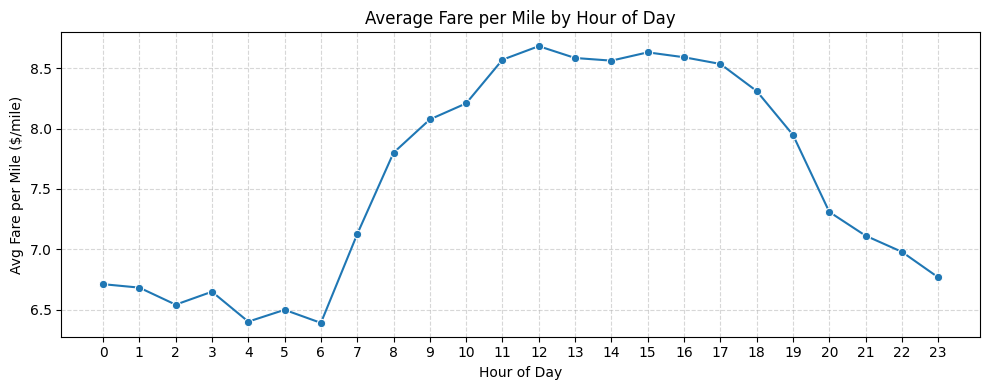

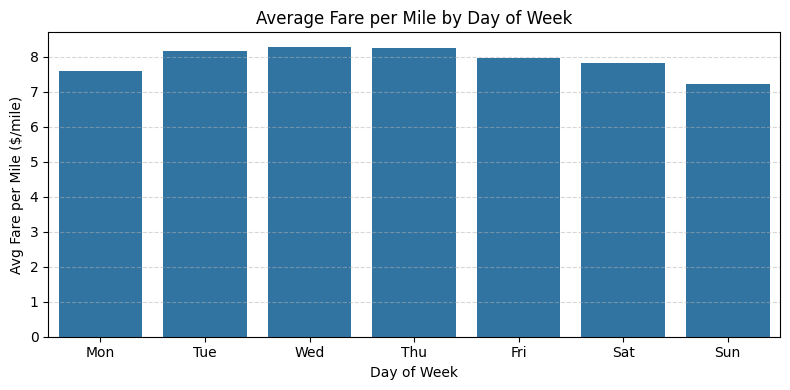

In [107]:
# Compare the average fare per mile for different days and for different times of the day

valid_fare_data['pickup_dow']  = valid_fare_data['tpep_pickup_datetime'].dt.dayofweek  # 0=Mon … 6=Sun
dow_names = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
valid_fare_data['pickup_dow_name'] = valid_fare_data['pickup_dow'].map(lambda x: dow_names[x])


#  Group by hour
hourly_fare = (
    valid_fare_data
    .groupby('pickup_hour')['fare_per_mile']
    .mean()
    .reset_index()
)

#  Group by day-of-week
daily_fare = (
    valid_fare_data
    .groupby('pickup_dow_name')['fare_per_mile']
    .mean()
    .reindex(dow_names)  
    .reset_index()
)

#  Plot avg fare per mile by hour
plt.figure(figsize=(10,4))
sns.lineplot(data=hourly_fare, x='pickup_hour', y='fare_per_mile', marker='o')
plt.title('Average Fare per Mile by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Fare per Mile ($/mile)')
plt.xticks(range(0,24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot avg fare per mile by day of week
plt.figure(figsize=(8,4))
sns.barplot(data=daily_fare, x='pickup_dow_name', y='fare_per_mile')
plt.title('Average Fare per Mile by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Avg Fare per Mile ($/mile)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

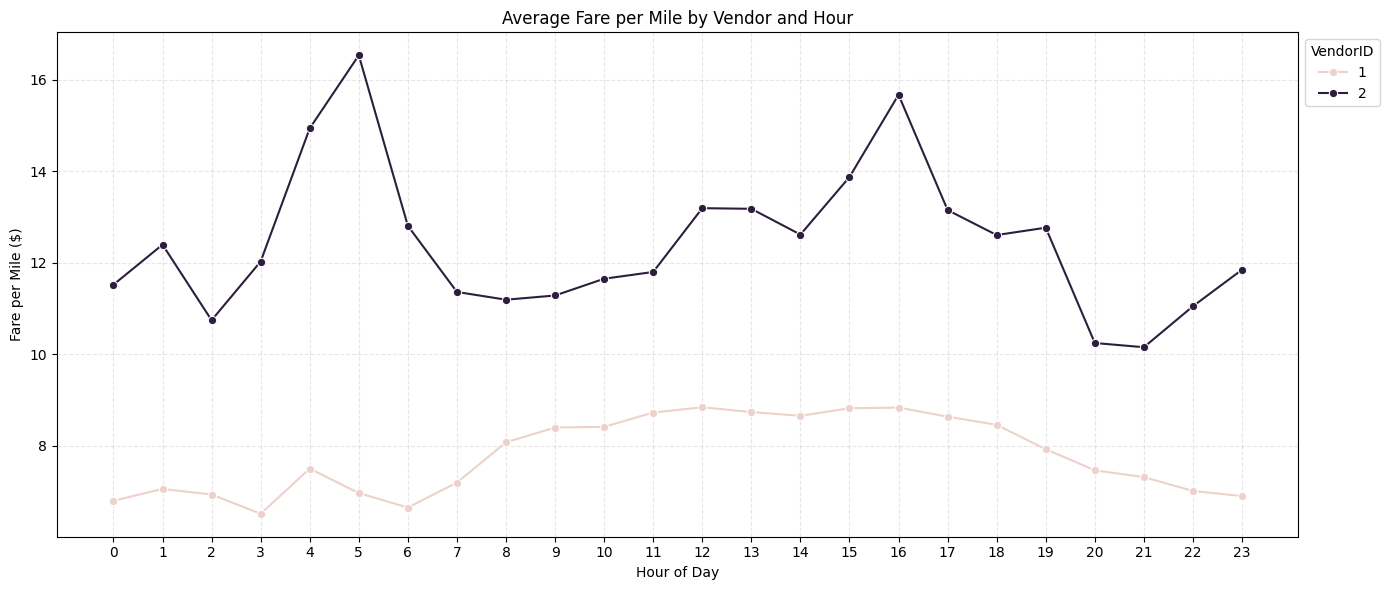

In [108]:
# Step 1: Ensure 'tpep_pickup_datetime' is in datetime format
df2['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])

# Step 2: Filter valid records and calculate fare per mile
filtered_df = df2[
    (df2['trip_distance'] > 0) & 
    (df2['fare_amount'] > 0)
].copy()
filtered_df['fare_per_mile'] = filtered_df['fare_amount'] / filtered_df['trip_distance']

# Step 3: Extract pickup hour from datetime
filtered_df['pickup_hour'] = filtered_df['tpep_pickup_datetime'].dt.hour

# Step 4: Compute average fare per mile grouped by VendorID and pickup hour
avg_fare_by_vendor_hour = (
    filtered_df
    .groupby(['VendorID', 'pickup_hour'])['fare_per_mile']
    .mean()
    .reset_index()
)

# Step 5: Plotting the average fare per mile
plt.figure(figsize=(14, 6))
sns.lineplot(data=avg_fare_by_vendor_hour, x='pickup_hour', y='fare_per_mile', hue='VendorID', marker='o')

# Plot customization
plt.title('Average Fare per Mile by Vendor and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile ($)')
plt.xticks(ticks=range(24))
plt.legend(title='VendorID', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


   VendorID distance_tier  fare_per_mile
0         1     0–2 miles      10.023688
1         1     2–5 miles       6.458273
2         1      5+ miles       4.442059
3         2     0–2 miles      18.048783
4         2     2–5 miles       6.546608
5         2      5+ miles       4.491348


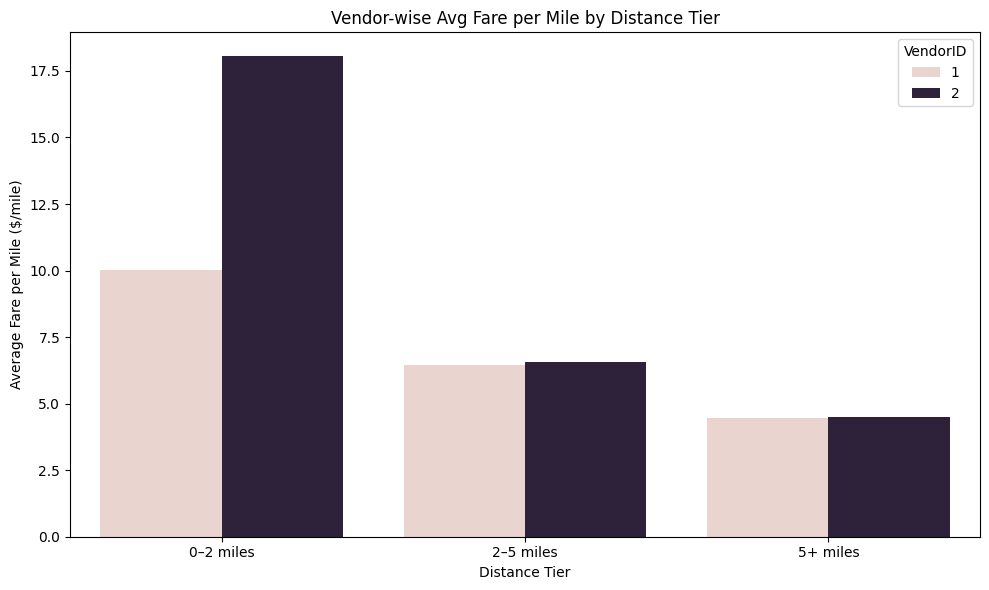

In [109]:
# Defining distance tiers

# Step 1: Keep only valid fare and distance entries
df_filtered = df2[
    (df2['trip_distance'] > 0) &
    (df2['fare_amount'] > 0)
].copy()

# Step 2: Calculate fare per mile for each trip
df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']

# Step 3: Create distance-based categories
tier_edges = [0, 2, 5, df_filtered['trip_distance'].max()]
tier_labels = ['0–2 miles', '2–5 miles', '5+ miles']
df_filtered['distance_tier'] = pd.cut(df_filtered['trip_distance'], bins=tier_edges, labels=tier_labels, right=False)

# Step 4: Calculate average fare per mile for each VendorID and distance tier
avg_fare_by_tier = (
    df_filtered
    .groupby(['VendorID', 'distance_tier'])['fare_per_mile']
    .mean()
    .reset_index()
)

# Display the result
print(avg_fare_by_tier)

# Step 5: Visualize the tier-based average fare per mile
plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_fare_by_tier,
    x='distance_tier',
    y='fare_per_mile',
    hue='VendorID'
)
plt.title('Vendor-wise Avg Fare per Mile by Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile ($/mile)')
plt.legend(title='VendorID')
plt.tight_layout()
plt.show()



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [117]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Compute tip percentage
valid_fare_data['tip_pct'] = (valid_fare_data['tip_amount'] / valid_fare_data['fare_amount']) * 100

# Define distance bins
bins = [0, 2, 5, 10, valid_fare_data['trip_distance'].max()]
labels = ['0–2 miles', '2–5 miles', '5–10 miles', '10+ miles']
valid_fare_data['distance_tier'] = pd.cut(df2['trip_distance'], bins=bins, labels=labels, right=False)

# 1) Average tip % by distance tier
avg_tip_by_distance = valid_fare_data.groupby('distance_tier')['tip_pct'].mean().reset_index()
print("Average Tip % by Distance Tier")
print(avg_tip_by_distance)

# 2) Average tip % by passenger count
avg_tip_by_passengers = valid_fare_data.groupby('passenger_count')['tip_pct'].mean().reset_index()
print("\nAverage Tip % by Passenger Count")
print(avg_tip_by_passengers)

# 3) Average tip % by pickup hour
avg_tip_by_hour = valid_fare_data.groupby('pickup_hour')['tip_pct'].mean().reset_index()
print("\nAverage Tip % by Hour of Day")
print(avg_tip_by_hour)

Average Tip % by Distance Tier
  distance_tier    tip_pct
0     0–2 miles  20.340514
1     2–5 miles  20.334962
2    5–10 miles  20.257887
3     10+ miles  20.315457

Average Tip % by Passenger Count
   passenger_count    tip_pct
0              1.0  20.564026
1              2.0  19.775167
2              3.0  19.052989
3              4.0  17.492458
4              5.0  20.553948
5              6.0  20.659825

Average Tip % by Hour of Day
    pickup_hour    tip_pct
0             0  20.333413
1             1  20.490688
2             2  20.425594
3             3  20.254846
4             4  18.135815
5             5  17.503951
6             6  18.402971
7             7  19.545229
8             8  19.945907
9             9  19.669472
10           10  19.236046
11           11  19.193309
12           12  19.133207
13           13  19.056528
14           14  19.000337
15           15  18.989382
16           16  20.843101
17           17  21.552763
18           18  22.117424
19           19  22.

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [98]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

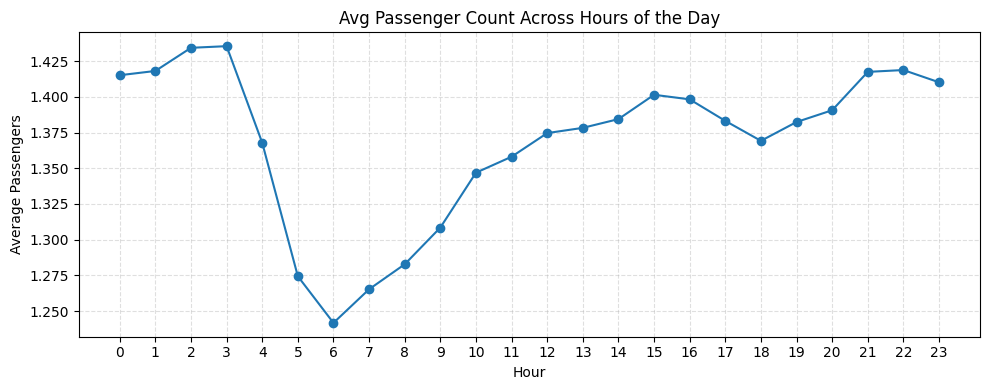

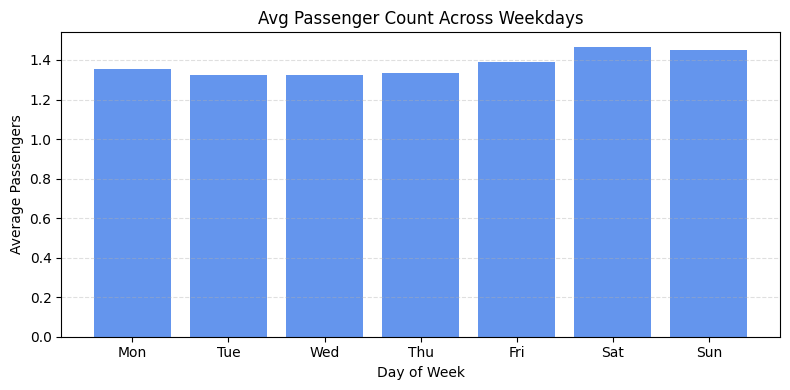

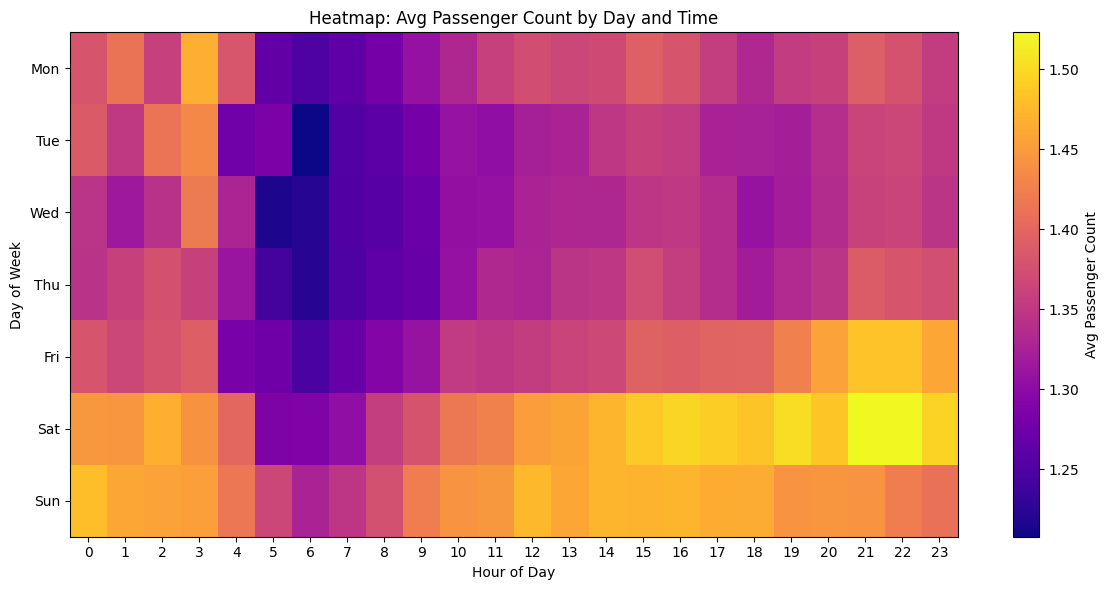

In [111]:
# See how passenger count varies across hours and days

# Convert pickup datetime to proper format and extract time components
df2['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])
df2['pickup_hour'] = df2['tpep_pickup_datetime'].dt.hour
df2['pickup_dow'] = df2['tpep_pickup_datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday
dow_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df2['pickup_dow_name'] = df2['pickup_dow'].apply(lambda i: dow_names[i])

# Step 1: Calculate average number of passengers per pickup hour
hourly_passenger_stats = df2.groupby('pickup_hour')['passenger_count'].mean().reset_index()

# Step 2: Calculate average passenger count per weekday
daily_passenger_stats = df2.groupby('pickup_dow_name')['passenger_count'].mean().reindex(dow_names).reset_index()

# Step 3: Generate a pivot table for heatmap (weekday vs. pickup hour)
heatmap_data = df2.pivot_table(
    index='pickup_dow_name',
    columns='pickup_hour',
    values='passenger_count',
    aggfunc='mean'
).reindex(dow_names)

# Plot A: Line graph for hourly trend
plt.figure(figsize=(10, 4))
plt.plot(hourly_passenger_stats['pickup_hour'], hourly_passenger_stats['passenger_count'], marker='o')
plt.title('Avg Passenger Count Across Hours of the Day')
plt.xlabel('Hour')
plt.ylabel('Average Passengers')
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Plot B: Bar chart for weekday pattern
plt.figure(figsize=(8, 4))
plt.bar(daily_passenger_stats['pickup_dow_name'], daily_passenger_stats['passenger_count'], color='cornflowerblue')
plt.title('Avg Passenger Count Across Weekdays')
plt.xlabel('Day of Week')
plt.ylabel('Average Passengers')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Plot C: Heatmap for pickup hour vs. weekday
plt.figure(figsize=(12, 6))
heatmap = plt.imshow(heatmap_data.values, aspect='auto', cmap='plasma')
plt.title('Heatmap: Avg Passenger Count by Day and Time')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.xticks(range(24), range(24))
plt.yticks(range(len(dow_names)), dow_names)
plt.colorbar(heatmap, label='Avg Passenger Count')
plt.tight_layout()
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')
Top pickup zones by total passengers:
                             zone  total_passengers  average_passenger_count  \
119                   JFK Airport          144937.0                 1.498243   
152                Midtown Center          120509.0                 1.386308   
228         Upper East Side South          117810.0                 1.336154   
227         Upper East Side North          105815.0                 1.336402   
221     Times Sq/Theatre District           92350.0                 1.486184   
153                  Midtown East           88319.0                 1.331188   
129             LaGuardia Airport           87725.0                 1.363587   
177  Penn Station/Madison Sq West           86072.0                 1.346664   
133           Lincoln Square East           85543.0                 1.378281   
154                 Midtown North       

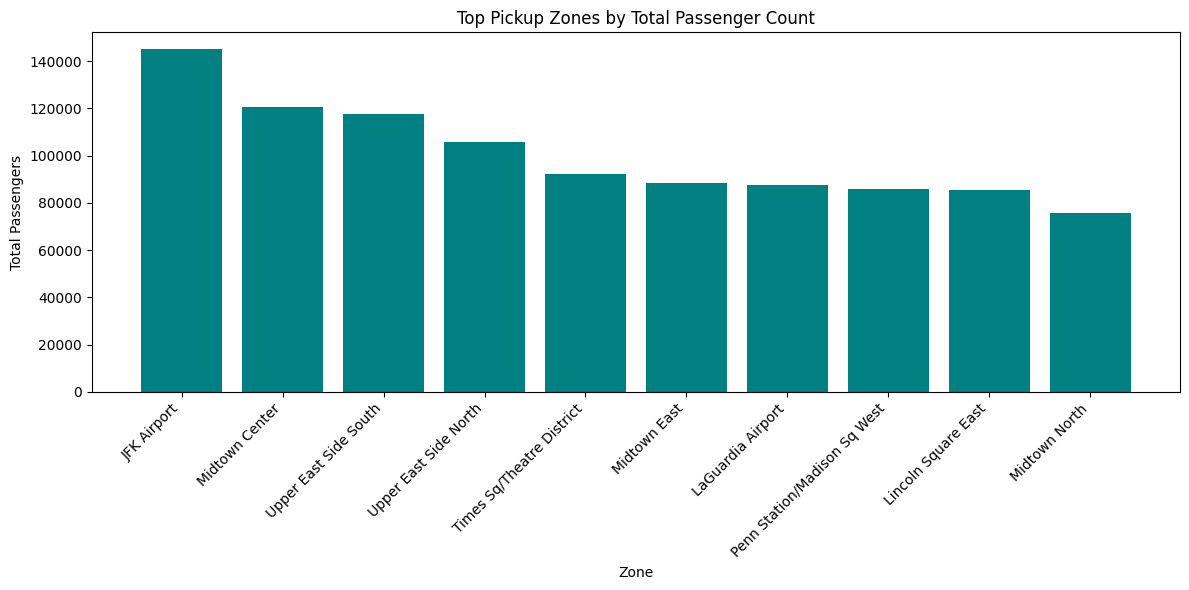

In [112]:
# How does passenger count vary across zones
print(zones.columns)

# Step 1: Adjust the column name to align with df2 for merging
zones_renamed = zones.rename(columns={'LocationID': 'PULocationID'})

# Step 2: Perform a left join to bring zone information into the main DataFrame
df_with_zones = df2.merge(
    zones_renamed[['PULocationID', 'zone']],
    how='left',
    on='PULocationID'
)

# Step 3: Compute statistics per pickup zone
zone_passenger_stats = df_with_zones.groupby('zone').agg(
    total_passengers=('passenger_count', 'sum'),
    average_passenger_count=('passenger_count', 'mean'),
    trip_count=('passenger_count', 'count')
).reset_index()

# Step 4: Order zones based on the total number of passengers
zone_passenger_stats = zone_passenger_stats.sort_values(
    by='total_passengers', ascending=False
)

# Step 5: Preview the top zones with the most passenger pickups
print("Top pickup zones by total passengers:")
print(zone_passenger_stats.head(10))

# Step 6: Plot the top 10 zones visually
top_zones = zone_passenger_stats.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_zones['zone'], top_zones['total_passengers'], color='teal')
plt.xticks(rotation=45, ha='right')
plt.title('Top Pickup Zones by Total Passenger Count')
plt.xlabel('Zone')
plt.ylabel('Total Passengers')
plt.tight_layout()
plt.show()




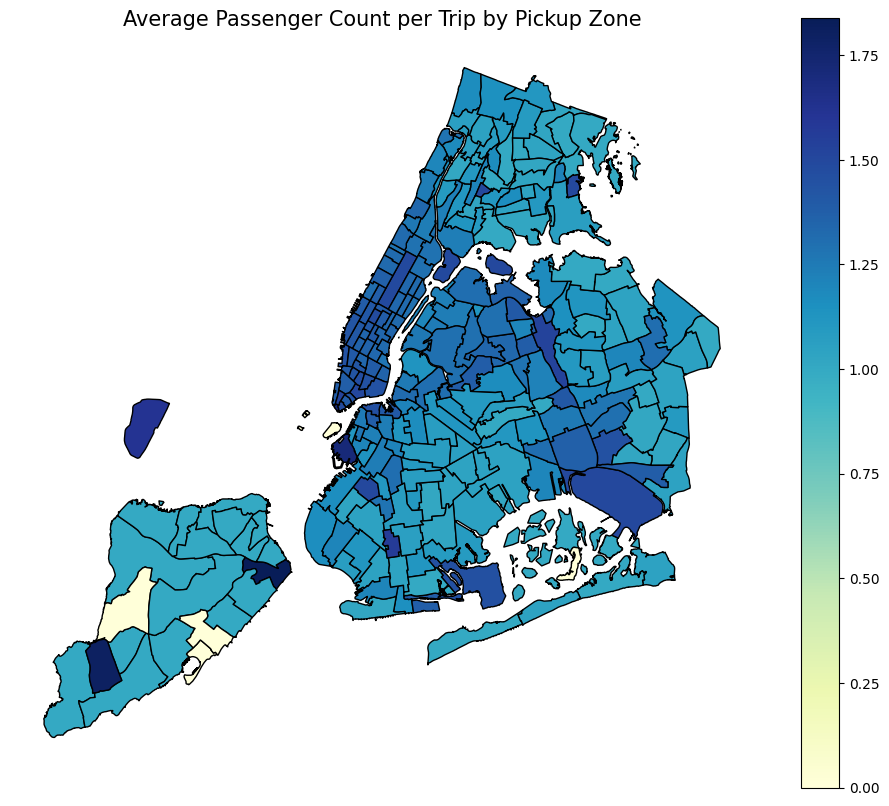

In [113]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Rename LocationID to PULocationID in the zones GeoDataFrame for consistency
zones_merged = zones.rename(columns={'LocationID': 'PULocationID'})

# Step 1: Group by PULocationID and compute total passengers and total trips
passenger_stats = df2.groupby("PULocationID").agg(
    total_passengers=("passenger_count", "sum"),
    total_trips=("passenger_count", "count")
).reset_index()

# Step 2: Calculate average passenger count per trip for each pickup zone
passenger_stats["avg_passenger_count"] = (
    passenger_stats["total_passengers"] / passenger_stats["total_trips"]
)

# Step 3: Merge the statistics with the zones GeoDataFrame
zones_with_passenger_avg = zones_merged.merge(
    passenger_stats[["PULocationID", "avg_passenger_count"]],
    on="PULocationID",
    how="left"
)

# Step 4: Handle missing values by filling with 0
zones_with_passenger_avg["avg_passenger_count"] = zones_with_passenger_avg[
    "avg_passenger_count"
].fillna(0)

# Step 5: Visualize the average passenger count on a map
fig, ax = plt.subplots(figsize=(12, 10))
zones_with_passenger_avg.plot(
    column="avg_passenger_count",
    cmap="YlGnBu",
    legend=True,
    ax=ax,
    edgecolor="black"
)
plt.title("Average Passenger Count per Trip by Pickup Zone", fontsize=15)
plt.axis("off")
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [115]:
# How often is each surcharge applied?

# 1. Examine unique values in 'extra' to understand its composition
print("Unique values in 'extra' column:")
print(df2['extra'].value_counts())

# 2. Calculate how many trips have a non-zero extra charge
extra_applied_count = (df2['extra'] > 0).sum()
total_trip_count = len(df2)
extra_applied_percentage = (extra_applied_count / total_trip_count) * 100

print(f"\nNumber of trips with 'extra' charge applied: {extra_applied_count} ({extra_applied_percentage:.2f}%)")

# 3. Analyze the application of other common surcharges
surcharge_columns = ['mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge']
for column in surcharge_columns:
    if column in df2.columns:
        surcharge_count = (df2[column] > 0).sum()
        surcharge_percentage = (surcharge_count / total_trip_count) * 100
        print(f"Trips with '{column}' > 0: {surcharge_count} ({surcharge_percentage:.2f}%)")
    else:
        print(f"'{column}' column is not present in the dataset.")


Unique values in 'extra' column:
extra
0.00     737275
2.50     465175
1.00     362970
5.00     133951
3.50     107075
7.50      16238
6.00      15494
4.25       6363
9.25       6337
1.75       3328
3.75       2606
6.75       2409
2.75       2211
8.75       2128
10.25      1690
7.75       1457
1.25       1409
11.75      1329
2.25        893
6.25        824
10.00       566
9.75        549
7.25        481
11.25       411
8.50        367
3.20         43
3.00         38
5.25         22
0.50         22
4.75         12
0.75         11
3.25          8
1.50          8
4.50          6
2.45          6
2.72          5
0.70          5
14.25         3
12.50         3
3.05          2
0.25          2
6.80          2
2.00          2
7.00          2
0.01          1
5.30          1
11.00         1
0.03          1
1.05          1
13.75         1
8.20          1
0.19          1
Name: count, dtype: int64

Number of trips with 'extra' charge applied: 1136471 (60.65%)
Trips with 'mta_tax' > 0: 1857123 (99.11

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

## 4.1.1 Optimize Routing and Dispatching

### Key Observations:
- Many trips show a **disproportionate relationship between duration and fare**, especially in congested zones.
- A scatterplot between `trip_duration_in_mins` and `fare_amount` reveals **no strong correlation**, meaning time-consuming trips don’t always yield higher fares.
- Trips with **very low distances but high durations** may indicate **congestion-heavy routes** or **idle delays**.

### Routing Recommendations:
- Avoid dispatching cabs to pickup zones where historical data shows **long durations with minimal fare returns**, especially if:
  - `trip_duration_in_mins > 30` and `trip_distance < 2 miles`
- Use **traffic-aware dispatching systems** to route trips that historically exhibit:
  - Long wait times
  - Unprofitable low-speed loops

### Optimization Tips:
- Introduce **AI routing filters** that deprioritize zones with consistently poor `fare per minute` performance.
- Reroute late-night pickups through expressways to mitigate idle time, especially for **short-trip, high-delay neighborhoods**.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

## 4.1.2 Strategic Cab Positioning

### High-Demand Indicators:
- Temporal analysis shows **increased activity** between:
  - **7 AM to 10 AM** and **5 PM to 9 PM** — prime time for cab positioning.
- Pickup counts spike in:
  - **Commercial hubs** during weekday evenings
  - Likely **transport interchanges** or **business districts**

### Positioning Strategy:
- **Morning Shifts (7 AM–10 AM)**:
  - Position cabs near **transit-heavy zones** and **residential clusters** for commuter trips.
- **Evening Shifts (5 PM–9 PM)**:
  - Focus on **commercial or office areas**, anticipating rider demand post-work.

### Dynamic Allocation Plan:

| Zone Type           | Suggested Time Slot | Cab Allocation Strategy      |
|---------------------|---------------------|-------------------------------|
| Residential Zones   | 6 AM – 9 AM         | Morning dispatch start point |
| Business Districts  | 5 PM – 9 PM         | Evening surge zone           |
| Transit Points      | All day             | Keep rotation coverage       |
| Under-served Areas  | Off-peak            | Use incentives to dispatch   |

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

## 4.1.3 Data-Driven Pricing Strategy Adjustments

###  Pricing Pressure Points:
- Long-duration, low-distance trips offer **poor returns** for drivers.
  - E.g., 40-minute trips with less than 2 miles distance observed.
- Fare structure doesn’t scale well with **idle-heavy routes**.

###  Strategic Adjustments:
- Introduce **time-based fare modifiers**:
  - Slight increase during **rush hours (6–9 AM / 5–9 PM)**
- Adjust pricing model to reflect **trip complexity**, not just duration/distance.

###  Targeted Incentives & Dynamic Fares:

- **Zone-Based Surcharges**:
  - Apply surcharges in areas with **known congestion or slow routes**
  - Reduce base fare for under-served zones to **encourage demand**

- **Sample Fare Logic**:

| Scenario                             | Adjustment        | Reason                                    |
|--------------------------------------|-------------------|-------------------------------------------|
| 40-min, 1.8-mile trip                | +$5 idle fee      | Compensate for delay                      |
| Rush hour (7–9 AM, 5–7 PM)           | 1.3x multiplier   | High demand and slow movement             |
| Under-utilized zone pickup (e.g., East Queens) | -$5 off base fare   | Boost trip volume in low-demand areas     |